## Обробка фото за домопогою методу головних компонент

Див.   __[тут](https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118)__ і __[тут](https://www.dataknowsall.com/imagepca.html). Перше    посилання- це посилання на сторінку автора коду (картинка інша). 

Ми розглянемо на прикладі фото котика те, як застосувати метод головних компонент для того, щоб стиснути фото, але при тому не погіршити якість. 

Завантажимо необхідні бібліотеки. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
!pip install opencv-python
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)


Також завантажимо картинку: 

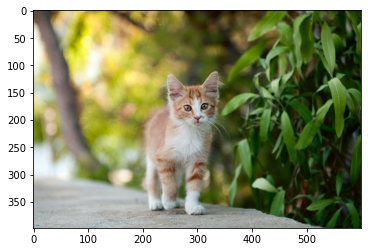

In [9]:
img = cv2.cvtColor(cv2.imread('c:/Users/vica/Dropbox/2021/STAT4K/cat.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Параметри фото: 

In [10]:
img.shape

(398, 600, 3)

Тут  $398\times 600$ пікселей у кожній з 3х матриць, які відповідають кольорам rgb. Розкладемо на ці три кольорових канали ("Blue Channel", "Green Channel", "Red Channel")

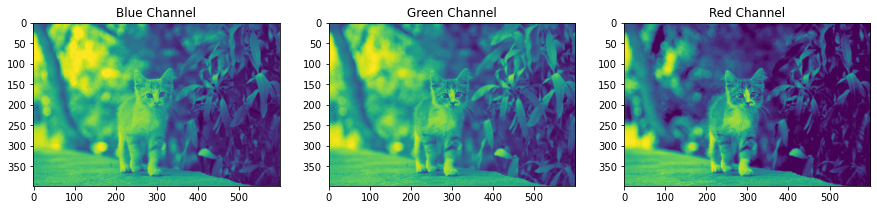

In [12]:
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

Розглянемо, наприклад, блакитний канал. Розглянемо дані в форматі DataFrame. 

In [13]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,90,91,92,93,92,92,89,89,90,89,...,20,20,19,30,44,48,44,38,32,29
1,93,92,93,93,93,92,91,89,92,89,...,20,19,17,28,41,45,41,35,30,28
2,93,95,94,95,95,93,92,91,92,91,...,20,18,14,23,34,39,37,32,27,26
3,95,97,97,97,96,95,93,92,93,92,...,21,18,12,19,28,33,31,28,26,25
4,100,100,99,99,98,97,95,95,96,95,...,22,19,11,17,24,29,28,27,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,176,180,166,162,160,147,140,134,118,89,...,16,18,3,6,18,20,5,0,8,17
394,183,180,170,167,163,159,160,156,146,140,...,14,15,5,7,16,17,4,0,8,13
395,177,169,174,179,171,174,182,173,184,180,...,14,15,9,9,14,14,4,1,6,9
396,169,171,173,173,175,175,173,176,172,173,...,16,15,10,10,13,10,2,1,8,7


Для того, щоб мати числа від 0 до 1, розділимо всі дані на 255.

In [14]:
df_blue = blue/255
df_green = green/255
df_red = red/255

В кожному каналі у нас 600 векторів, тобто на даний момент наша розмірність 600. Покажемо, що методом головних компонент розмірність можна зменшити до 50. Для цього ми застосовуємо функцію PCA. Відповідно, ми обираємо метод (PCA) і робимо підгонку (fit). Кількість головних компонент ми обрали рівну 50. 

In [15]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

Тоді для кожного кольору маємо матриці розмірності $398\times 50$. $E$ $H$  $E^{-1} H$ 

In [16]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(398, 50)
(398, 50)
(398, 50)


При цьому, ці 50 компонент пояснює більше ніж 98\% дисперсії. 

In [17]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.985047796067295
Green Channel: 0.9851690354451759
Red Channel  : 0.9870256713793237


Тепер наша задача трансформувати  DataFrame's  в відповідні кольори і склеїти всі матриці в один масив, який ми вже можем трансформувати у фотографію. 

In [18]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(398, 600) (398, 600) (398, 600)
(398, 600, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


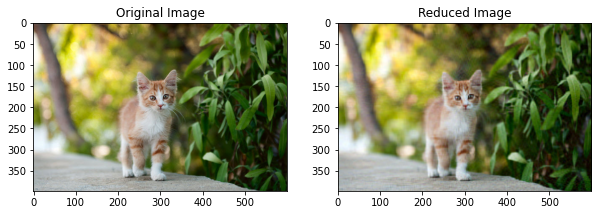

In [19]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

Візуально, картинки мають однакови якість!